# Hypothesis Testing

It is assumed that the mean systolic blood pressure is μ = 120 mm Hg. In the Honolulu Heart Study, a sample of n = 100 people had an average systolic blood pressure of 130.1 mm Hg with a standard deviation of 21.21 mm Hg. Is the group significantly different (with respect to systolic blood pressure!) from the regular population?

In [9]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
def visual_test(statistic, critical, dist = 'Norm', df = 0):
    '''
    Function to plot the normal or the t-student distribution 
    showing the location of the critical values and the statistic location.
    Inputs:
        statistic -> user's statistic
        critical  -> critical value
    Parameter:
        dist -> distribution to use
        df   -> degrees of freedom
    Outputs:
        Plots the corresponding distribution showin the user statistic location and the critical value.
    '''

    mu = 0
    sigma = 1

    x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
    x0 = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)

    if ( dist == 'Norm' ):
        plt.plot(x, stats.norm.pdf(x, mu, sigma))
        plt.fill_between(x0,stats.norm.pdf(x, mu, sigma),where = (x < -critical),facecolor='red')
        plt.fill_between(x0,stats.norm.pdf(x, mu, sigma),where = (x > critical),facecolor='red')
    else:
        if ( df == 0 ):
            while ( df == 0 or type(df) != int):
                try:
                    df = int(input("Set the correct value of degrees of freedom please: " )) 
                except:
                    df = 0       
        plt.plot(x, stats.t.pdf(x,df))
        plt.fill_between(x0,stats.t.pdf(x,df),where = (x < -critical),facecolor='red')
        plt.fill_between(x0,stats.t.pdf(x,df),where = (x > critical),facecolor='red')

    plt.axvline(-critical, c = 'r')
    plt.axvline(critical, c = 'r')
    plt.axvline(-statistic,c='b')
    plt.axvline(statistic,c='b')

    plt.show()

In [14]:
# Null Hypothesis is μ = 120 mm Hg
# Alternative Hypothesis is μ != 120 mm Hg
# n =100
# sample mean = 130.1 mm Hg
#SD of sample mean = 21.21 Hg
# Degree of freedom = 1- n, which is 99
T = (130.1-120)/ (21.21/100**(1/2))
print("Our t statistic is: {:.2f}".format(T))

Our t statistic is: 4.76


In [15]:
tc = stats.t.ppf(1-(0.05/2),df = 99)

print("The tc critical value is: {:.3f}".format(tc))

The tc critical value is: 1.984


Compare T with tc. Are you in the rejection area?
#### reject it

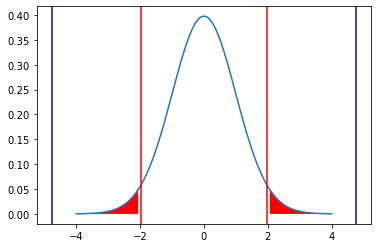

In [16]:
visual_test(T,tc,dist = 'T',df=99)